<a href="https://colab.research.google.com/github/ribollequis87/logica_mat_discreta/blob/main/MIDTERM_1SEM2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOGICA E MATEMÁTICA DISCRETA - AVALIAÇÃO PARCIAL - 23/03/2023**

**NOME:**

**QUESTÃO 1 (2.0 pontos)** Pedro é um aluno de Ciência da Computação que gosta de algoritmos e estruturas de dados. Se um aluno de Ciência da Computação gosta de algoritmos ou estruturas de dados, ele sabe que terá que estudar muito. **Utilizando o módulo flloat, modele este cenário como uma proposição e verifique que Pedro terá que estudar muito.**

In [1]:
!pip install flloat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 4.9 MB/s eta 0:00:00


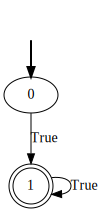

In [10]:
from flloat.parser.ltlf import LTLfParser

parser = LTLfParser()
formula = "F ((pedro_estuda_ccomp & pedro_gosta_algoritmos & pedro_gosta_dados & (pedro_estuda_ccomp & (pedro_gosta_algoritmos | pedro_gosta_dados) -> pedro_estudara_muito)) -> pedro_estudara_muito)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
g = dfa.to_graphviz()
g

**QUESTÃO 2 (3.0 pontos)** Um transistor é um pequeno dispositivo muito utilizado na construção de diversos processadores. A este pequeno dispositivo são ligados três terminais que recebem o nome de “emissor”, “coletor” e “base”, conforme mostrado na figura abaixo:


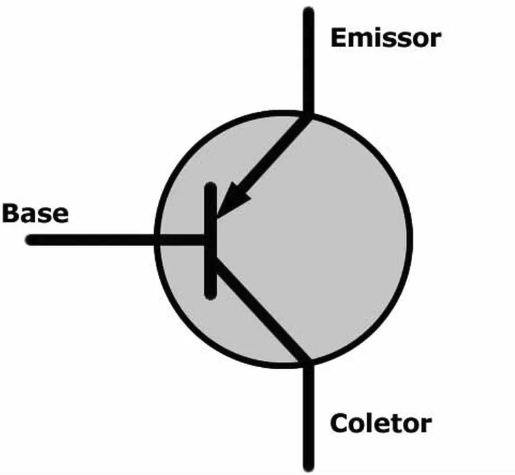

Nos circuitos digitais seu funcionamento é muito simples. Emissor e coletor são conectados em série a um circuito elétrico que pode ou não ser alimentado por uma corrente. A base é ligada a outro ponto do circuito cuja finalidade é controlar o estado do transistor:

* Quando uma tensão elétrica é aplicada à base, o transistor “abre”, ou seja, funciona como condutor, permitindo que uma corrente elétrica flua entre emissor e coletor e alimente o circuito ao qual está ligado.

* Quando a tensão aplicada à base é nula, o transistor “fecha” e se comporta como um isolante, impedindo o fluxo da corrente e cortando a alimentação do circuito.

**2.1 (2.0 pontos)** Modele este pequeno componente com a Lógica LTL.

In [8]:
!pip install pyModelChecking

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.5 MB/s eta 0:00:00


In [9]:
from pyModelChecking.LTL import *
p = Parser()
print(p.grammar)


        formula: s_formula | p_formula

        s_formula: ("A") u_formula      -> forall_formula

        p_formula: u_formula ( ("or"|"|") u_formula )+   -> or_formula
                 | u_formula ( ("and"|"&") u_formula )+   -> and_formula
                 | u_formula ("-->") u_formula        -> imply_formula
                 | u_formula ("U") u_formula        -> until_formula
                 | u_formula ("R") u_formula        -> release_formula
                 | u_formula

        u_formula: "true"                -> true
                 | "false"                -> false
                 | a_prop
                 | "(" p_formula ")"
                 | ("not"|"~") u_formula      -> not_formula
                 | ("X") u_formula      -> next_formula
                 | ("F") u_formula      -> eventually_formula
                 | ("G") u_formula      -> globally_formula

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING           -> e_string

       

In [17]:
from pyModelChecking import *
from pyModelChecking.LTL import *
p="A(G((tensao_eletrica --> transistor_abre) & (not(tensao_eletrica) --> not(transistor_abre)))"
K=Kripke(R=[(0,0)], L={0: set(['p'])})

**2.2 (1.0 ponto)** Mostre, usando o seu modelo LTL de transistor, que não pode haver corrente entre o emissor e coletor se a tensão aplicada à base for nula.

In [19]:
modelcheck(K,"A(G(not(base_com_tensao) --> passagem_corrente))")

set()

**QUESTÃO 3 (2.0 pontos)** Verifique se a seguinte identidade em Lógica CTL (extensão da LTL) é válida ou não:

### A[φUψ] ≡ ¬( E[(¬ψ)U¬(φ∨ψ)] ∨ EG(¬ψ) )

In [21]:
from pyModelChecking.CTL import *
p = Parser()
print(p.grammar)


        s_formula: "true"     -> true
                 | "false"    -> false
                 | a_prop
                 | ("A") p_formula       -> forall_formula
                 | ("E") p_formula       -> exists_formula
                 | ("not"|"~") s_formula       -> not_formula
                 | "(" u_formula ")"

        u_formula: s_formula
                  | s_formula ( ("or"|"|") s_formula )+      -> or_formula
                  | s_formula ( ("and"|"&") s_formula )+      -> and_formula
                  | s_formula ("-->") s_formula           -> imply_formula

        p_formula: ("X") s_formula  -> next_formula
                 | ("F") s_formula  -> eventually_formula
                 | ("G") s_formula  -> globally_formula
                 | s_formula ("U") s_formula -> until_formula
                 | s_formula ("R") s_formula -> release_formula
                 | "(" p_formula ")"

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING          

In [22]:
p="A(U(phi,psi))"
K=Kripke(R=[(0,0)], L={0: set(['p'])})
modelcheck(K,"not(E(not(psi)U not(phi or psi))) or E(G(not(psi)))")

{0}

**QUESTÃO 4 (3.0 pontos)** O programa Python abaixo calcula o maior de três números a,b e c:

if a>b:

    if a>c:

        maior=a
    
    else:

        maior=c

else:

    if b>c:

        maior=b

    else:

        maior=c

**4.1 (2.0 pontos)** Utilizando a Lógica LTL, construa um Modelo de Kripke para este programa.

In [ ]:
from pyModelChecking.LTL import *



if a>b:

    if a>c:

        maior=a
    
    else:

        maior=c

else:

    if b>c:

        maior=b

    else:   

        maior=c

In [23]:
K=Kripke(R=[(0,1),(0,4),(1,2),(1,3),(2,2),(3,3),(4,5),(4,6),(5,5),(6,6)],
         L={0: set(['']),
            1: set(['amb']),
            2: set(['amc']),
            3: set(['cmia']),
            4: set(['bmia']),
            5: set(['bmc']),
            6: set(['cmib'])})

**4.2 (1.0 ponto)**  Existe algum estado do seu modelo onde valha a > b > c ?

In [24]:
modelcheck(K,"amb & bmc")

set()